In [1]:
import MDAnalysis as mda
import pytim
from pytim.datafiles import MICELLE_PDB
import nglview

u = mda.Universe(MICELLE_PDB)
g = u.select_atoms('resname DPC')


/Users/marcello/Library/Python/3.12/lib/python/site-packages/MDAnalysis/topology/PDBParser.py:350: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using universe.guess_TopologyAttrs(context='default', to_guess=['elements']).
  warnings.warn("Element information is missing, elements attribute "


In [2]:
# we compute the interface and save it to a .cube file, to read it afterwards with nglview
interface = pytim.WillardChandler(u, group=g, mesh=1.5, alpha=3.0,centered=True)
interface.writecube('data.cube',order='zyx')

In [3]:
view = nglview.show_mdanalysis(u.atoms) # the atoms, this will be component_0 in nglview
view.add_component('data.cube') # the density data, this will be component_1 in nglview
 
view.clear() # looks like this is needed in order for view._display_image() to work correctly 
# let's center the view on our atoms, and draw them as spheres  
view.component_0.center()
view.component_0.add_spacefill(selection='DPC')

# let's add a transparent, red representation for the isodensity surface
view.component_1.add_surface(color='red',isolevelType="value",isolevel=0.4,opacity=0.4) 

# add a nice simulation box
view.add_unitcell() 

In [4]:
view.display()

NGLWidget()

In [5]:
# this cell and the following one are only needed to embed a picture that can be visualized on github
view.render_image()

Image(value=b'', width='99%')

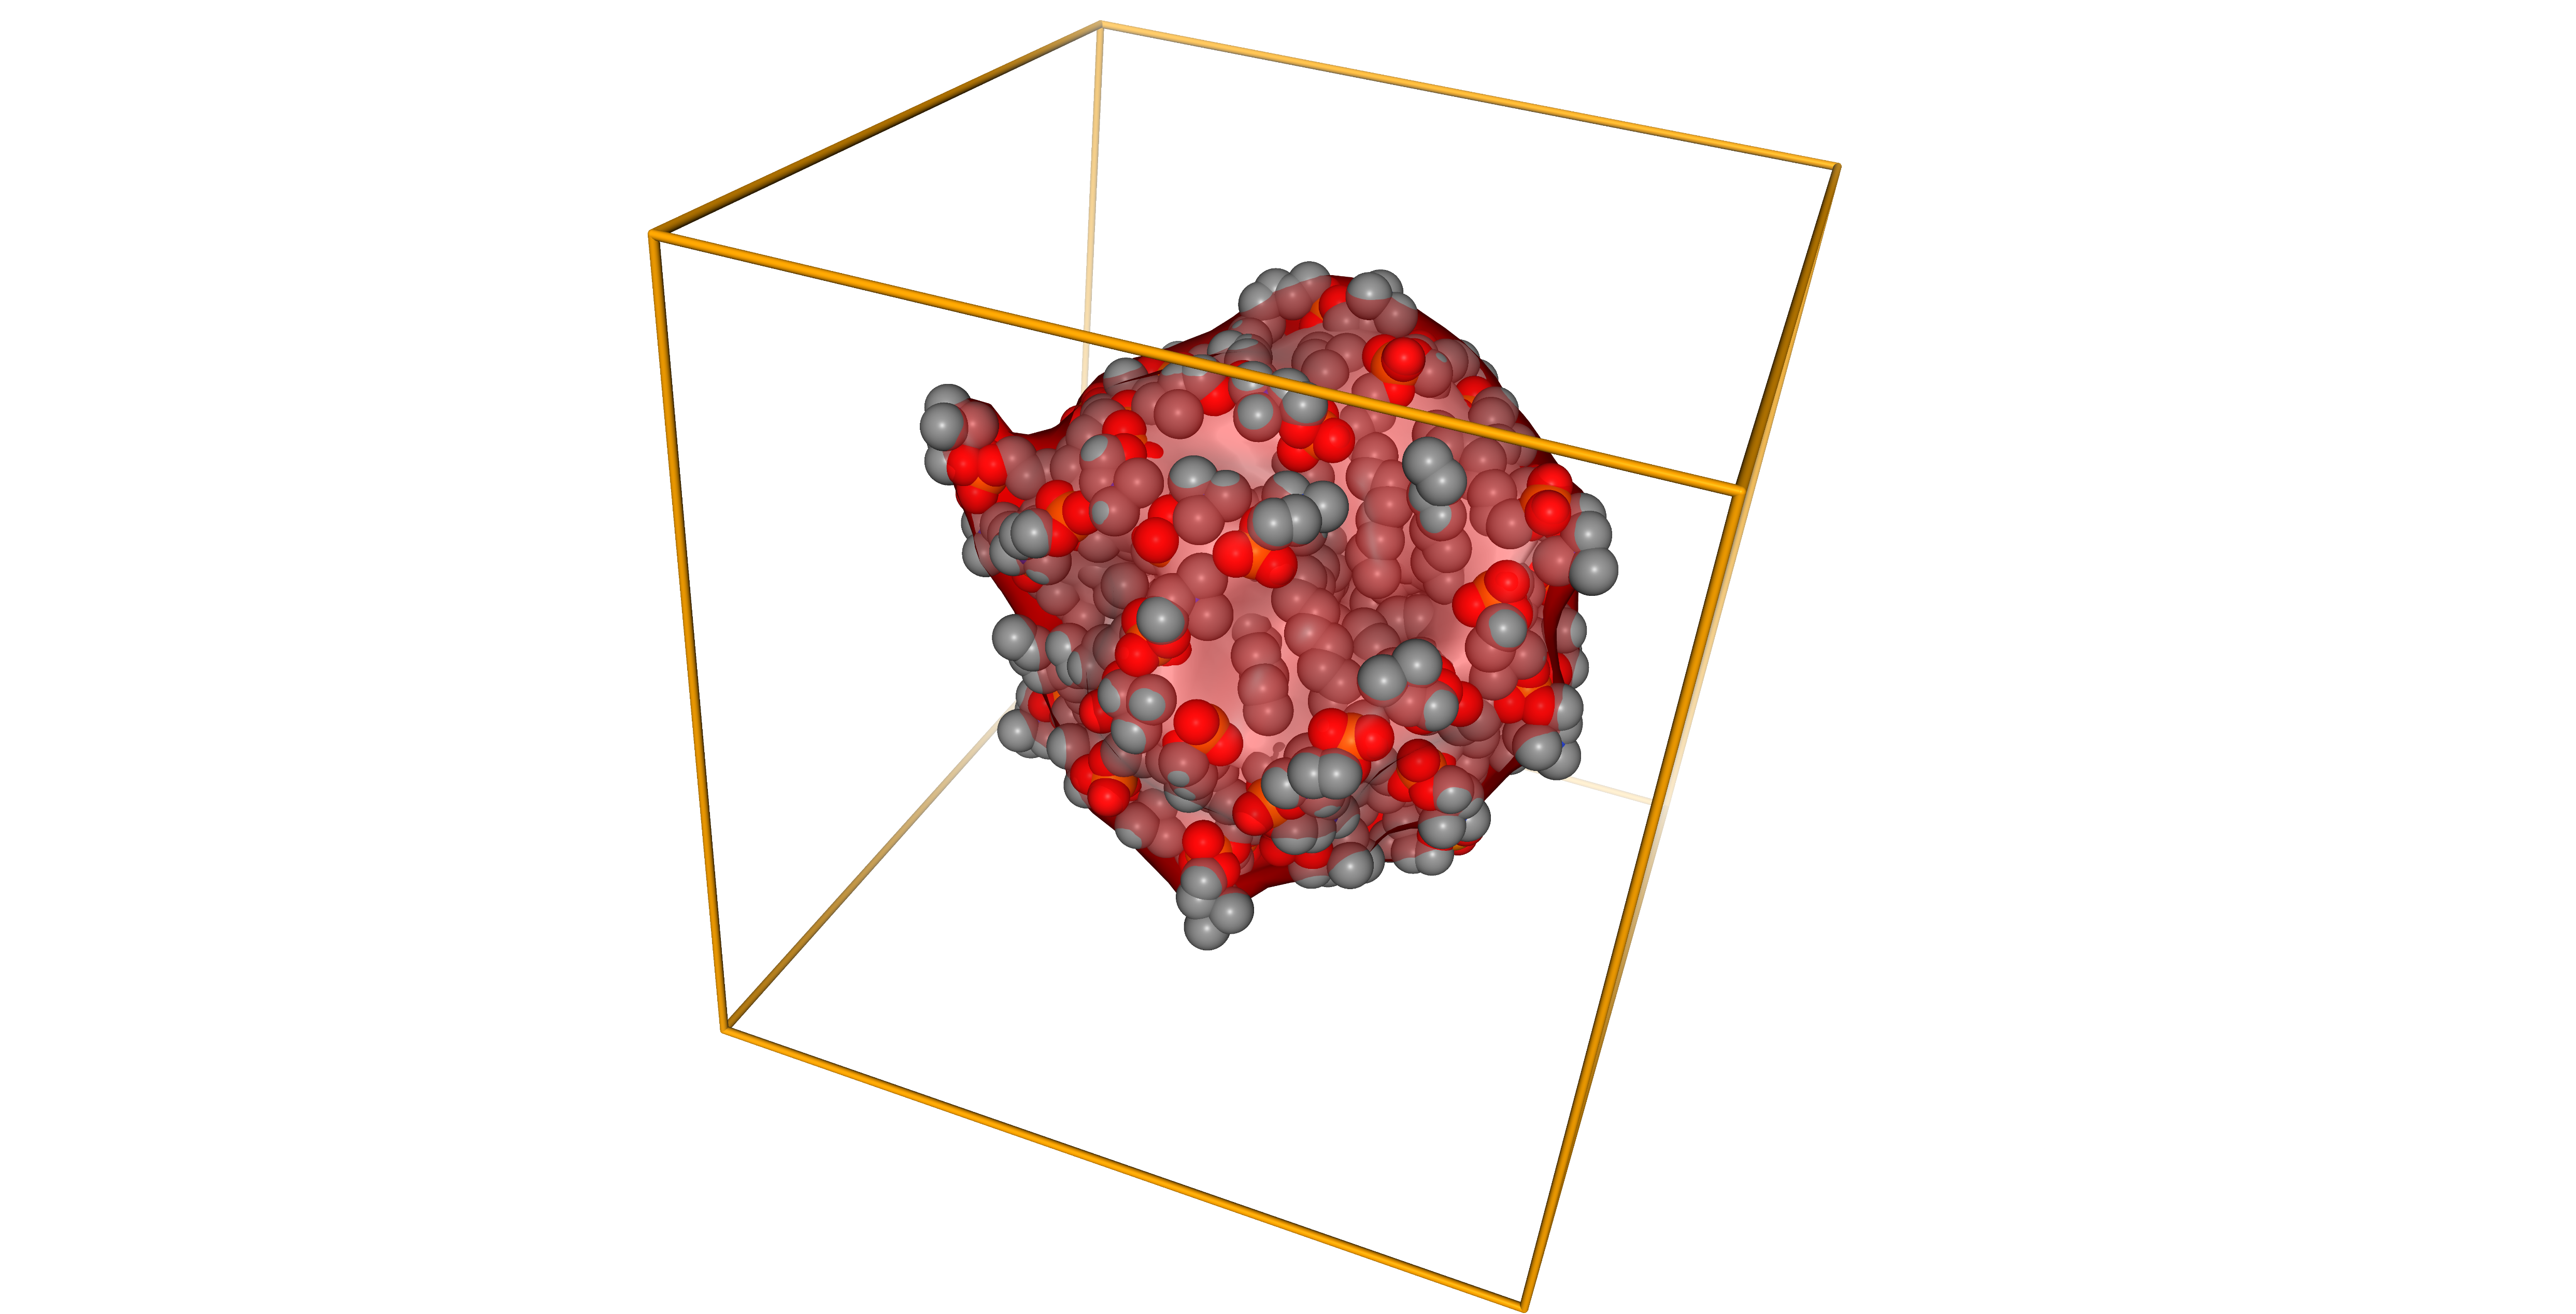

In [6]:
view._display_image()